## Loading the Dataset

In [117]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width', 'petal length', 'petal width', 'target'])
# df['target']                             

## Normalizing Dataset 

In [118]:

X,y = load_iris(return_X_y=True)
features =['sepal length', 'sepal width', 'petal length', 'petal width']
#separating features
x = df.loc[:, features].values
# print("raw inputs",x)
#separating targets
y = df.loc[:, ['target']].values
# print(y)
#standardising the features
x_norm = StandardScaler().fit_transform(x)
# print("normalized inputs",x_norm)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# PCA.fit(X_train)
# X_train = pca.transform(X_train)
# X_test = pca.transform(X_test)
# X_train, X_test, y_train, y_test = train_test_split(pc, y, test_size=0.2, random_state=0)
# print(X_test)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print(accuracy_score(y_test, y_pred))

Number of mislabeled points out of a total 30 points : 567
0.9666666666666667


c:\users\syed\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## PCA projection to 2D

In [120]:

pca =PCA(n_components =2)
principalComponents = pca.fit_transform(x_norm)
pdf = pd.DataFrame(data=principalComponents, columns = ['pc1', 'pc2'])

# pdf

In [121]:
finaldf = pd.concat([pdf,df[['target']]], axis =1)
finaldf.head()

,pc1,pc2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


## visualizing components

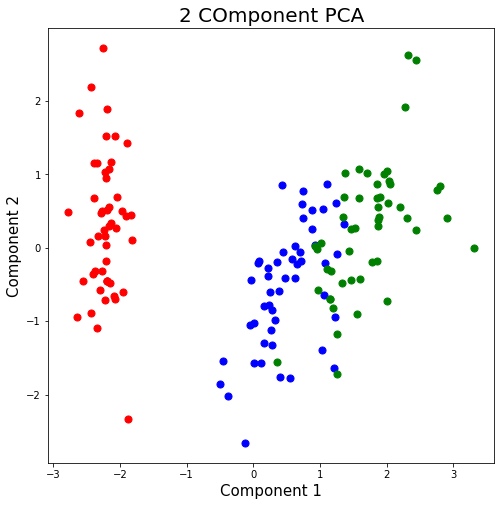

In [122]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Component 1', fontsize =15)
ax.set_ylabel('Component 2', fontsize =15)

ax.set_title('2 COmponent PCA', fontsize =20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors =['r','b','g']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['target']==target
    ax.scatter(finaldf.loc[indicesToKeep,'pc1'], finaldf.loc[indicesToKeep,'pc2'], c=color, s=50)
    

In [160]:
#NB scikit learn
X, y = load_iris(return_X_y=True)
# X = StandardScaler().fit_transform(X)
# pca =PCA(n_components =2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = X_train*10
X_test = X_test *10


In [162]:
X_test

array([[58., 28., 51., 24.],
       [60., 22., 40., 10.],
       [55., 42., 14.,  2.],
       [73., 29., 63., 18.],
       [50., 34., 15.,  2.],
       [63., 33., 60., 25.],
       [50., 35., 13.,  3.],
       [67., 31., 47., 15.],
       [68., 28., 48., 14.],
       [61., 28., 40., 13.],
       [61., 26., 56., 14.],
       [64., 32., 45., 15.],
       [61., 28., 47., 12.],
       [65., 28., 46., 15.],
       [61., 29., 47., 14.],
       [49., 36., 14.,  1.],
       [60., 29., 45., 15.],
       [55., 26., 44., 12.],
       [48., 30., 14.,  3.],
       [54., 39., 13.,  4.],
       [56., 28., 49., 20.],
       [56., 30., 45., 15.],
       [48., 34., 19.,  2.],
       [44., 29., 14.,  2.],
       [62., 28., 48., 18.],
       [46., 36., 10.,  2.],
       [51., 38., 19.,  4.],
       [62., 29., 43., 13.],
       [50., 23., 33., 10.],
       [50., 34., 16.,  4.]])

In [163]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print(accuracy_score(y_test, y_pred))

Number of mislabeled points out of a total 30 points : 1
0.9666666666666667


In [164]:
gnb = BernoulliNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print(accuracy_score(y_test, y_pred))

Number of mislabeled points out of a total 30 points : 24
0.2


In [165]:
X, y = load_iris(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [166]:
x_train = x_train *10
x_test = x_test *10

x_test

array([[58., 28., 51., 24.],
       [60., 22., 40., 10.],
       [55., 42., 14.,  2.],
       [73., 29., 63., 18.],
       [50., 34., 15.,  2.],
       [63., 33., 60., 25.],
       [50., 35., 13.,  3.],
       [67., 31., 47., 15.],
       [68., 28., 48., 14.],
       [61., 28., 40., 13.],
       [61., 26., 56., 14.],
       [64., 32., 45., 15.],
       [61., 28., 47., 12.],
       [65., 28., 46., 15.],
       [61., 29., 47., 14.],
       [49., 36., 14.,  1.],
       [60., 29., 45., 15.],
       [55., 26., 44., 12.],
       [48., 30., 14.,  3.],
       [54., 39., 13.,  4.],
       [56., 28., 49., 20.],
       [56., 30., 45., 15.],
       [48., 34., 19.,  2.],
       [44., 29., 14.,  2.],
       [62., 28., 48., 18.],
       [46., 36., 10.,  2.],
       [51., 38., 19.,  4.],
       [62., 29., 43., 13.],
       [50., 23., 33., 10.],
       [50., 34., 16.,  4.]])

In [167]:
df = pd.DataFrame(x_train, columns=['f1','f2', 'f3','f4'])

df ['target'] = y_train
# df_mean = df.groupby(['target']).mean()
df_mean = df.groupby(['target']).mean().astype(int)
# df_var = df.groupby(['target']).var()
df_var = df.groupby(['target']).var().astype(int)


In [168]:
df_var.head()

,f1,f2,f3,f4
target,,,,
0,13,14,2,1
1,27,10,23,4
2,39,11,30,6


In [169]:
df_mean.head()

,f1,f2,f3,f4
target,,,,
0,50,34,14,2
1,58,27,42,13
2,66,29,55,20


In [170]:
# df_train = x_train*10
# df_test = x_test*10
# df_test

In [171]:
#mean of features
df_mean

,f1,f2,f3,f4
target,,,,
0,50,34,14,2
1,58,27,42,13
2,66,29,55,20


In [172]:
#variance of features
df_var

,f1,f2,f3,f4
target,,,,
0,13,14,2,1
1,27,10,23,4
2,39,11,30,6


In [173]:
#prior probability 
dfp = df.groupby('target').size()
Prior0 = int(dfp[0]/len(df)*100)
Prior1 = int(dfp[1]/len(df)*100)
Prior2 = int(dfp[2]/len(df)*100)
prior_t = [Prior0, Prior1, Prior2]

In [174]:
mean_arr = df_mean.values
var_arr = df_var.values
# x_test = x_test *10
# x_test

In [175]:

def mux1(v,k):
    x = 1
#     print(type(v))
    for i in range(len(v)):
        if(i==k): continue
        else:  x = x* v[i]
    return x


def GNB(x,m,v):
    B0=1; C0 =1.0;  A0=1; e = 2.718
    c = np.zeros(len(v));
    for i in range(len(v)):
        B0 = B0* v[i]
        c[i] = (x[i]-m[i])*(x[i]-m[i]) 
    
    D0 = B0
    for i in range(len(c)):
        C0 = C0+c[i]*mux1(v,i)
#     print(A0,B0,C0,D0)    
    ex = float(C0/D0)
    out = (A0/B0)*pow(e,-1*ex)
    return(out) 

In [176]:
#working
# x = x_test[2]
# m0 = mean_arr[0]
# v0 = var_arr[0]
# prob1 =GNB(x,m0,v0) * pt[0]
# prob1

In [177]:
mean_arr[2]

array([66, 29, 55, 20])

In [178]:
#working
# x = x_test[2]
# m1 = mean_arr[1]
# v1 = var_arr[1]
# prob1 =GNB(x,m1,v1) * pt[1]
# prob1

In [179]:
#working
# x = x_test[2]
# m2 = mean_arr[2]
# v2 = var_arr[2]
# prob1 =GNB(x,m2,v2) * pt[2]
# prob1

In [180]:
def classification(x,m,v,pt):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        t = x[i]
        m = mean_arr[0]
        v = var_arr[0]
#         print(t,m,v)
        pred0 = GNB(t,m,v) * pt[0]
        m = mean_arr[1]
        v = var_arr[1]
        pred1 = GNB(t,m,v) * pt[1]
        m = mean_arr[2]
        v = var_arr[2]
        pred2 = GNB(t,m,v) * pt[2]
        if (pred0>pred1 and pred0>pred2): z[i] = 0
        elif(pred1>pred0 and pred1>pred2): z[i] = 1
        else: z[i] = 2
    return z
        

In [181]:
pred = classification(df_test,mean_arr,var_arr,prior_t)
pred

IndexError: index 3 is out of bounds for axis 0 with size 3

In [182]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [183]:
print(accuracy_score(y_test,pred))

0.9


In [190]:
pca =PCA(n_components =)
pca.fit(x_train,pca)

df_train = pca.transform(x_train).astype(int)
df_test = pca.transform(x_test).astype(int)
df = pd.DataFrame(df_train, columns=['f1','f2','f3','f4'])
df ['target'] = y_train
# df_mean = df.groupby(['target']).mean()
df_mean = (df.groupby(['target']).mean()).astype(int)
# df_var = df.groupby(['target']).var()
df_var = (df.groupby(['target']).var()).astype(int)


In [191]:
mean_arr = df_mean.values
var_arr = df_var.values

In [192]:
pred = classification(df_test,mean_arr,var_arr,prior_t)
pred

<ipython-input-175-fa32dfeb075b>:21: RuntimeWarning: divide by zero encountered in double_scalars
  ex = float(C0/D0)
<ipython-input-175-fa32dfeb075b>:22: RuntimeWarning: divide by zero encountered in long_scalars
  out = (A0/B0)*pow(e,-1*ex)
<ipython-input-175-fa32dfeb075b>:22: RuntimeWarning: invalid value encountered in double_scalars
  out = (A0/B0)*pow(e,-1*ex)


array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [193]:
print(accuracy_score(y_test,pred))

0.2


In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Component 1', fontsize =15)
ax.set_ylabel('Component 2', fontsize =15)

ax.set_title('2 COmponent PCA', fontsize =20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors =['r','b','g']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['target']==target
    ax.scatter(finaldf.loc[indicesToKeep,'pc1'], finaldf.loc[indicesToKeep,'pc2'], c=color, s=50)